<h1>Q 1)

Importing the dataset and splitting it into train,test and validation set

In [176]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
faces,targets = fetch_olivetti_faces(return_X_y=True)

In [177]:
trainx,testx,trainy,testy=train_test_split(faces,targets,stratify=targets,test_size=0.5)

In [178]:
validx,testx,validy,testy=train_test_split(testx,testy,stratify=testy,test_size=0.5)

plotting each unique faces as per the dataset's target

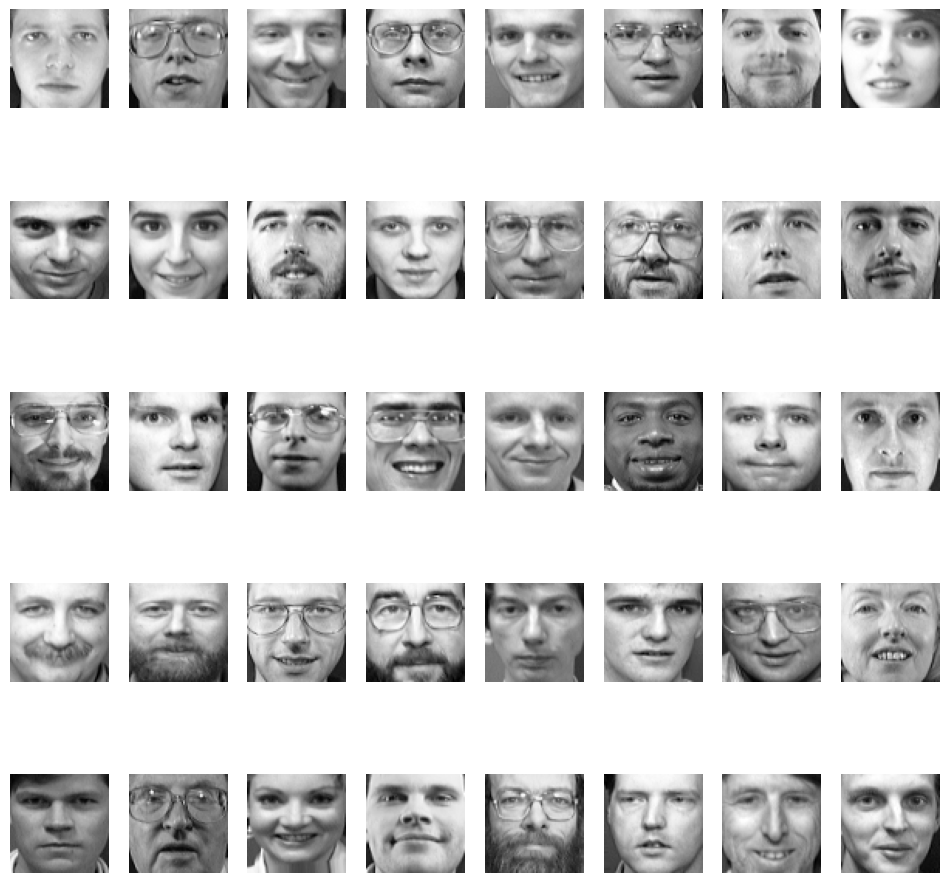

In [179]:
k=1
plt.figure(figsize=(12,12))
for i in range(0,400,10):
    plt.subplot(5,8,k)
    plt.axis(False)
    plt.imshow(faces[i].reshape(64,64),cmap="gray")
    k+=1

trying to find the best number of clusters using silhoutte score and elbow of inertia plot

In [180]:
from sklearn.metrics import silhouette_score,silhouette_samples
k=150
kmeans_per_k=[KMeans(n_clusters=i).fit(trainx) for i in range(1,k+1)]
inertia_per_k= [kmeans_per_k[i].inertia_ for i in range(k)]
min_inertia= np.min(inertia_per_k)
min_inertia_k= np.argmin(inertia_per_k)
silhouette_scores = [silhouette_score(trainx,kmeans.labels_) for kmeans in kmeans_per_k[1:]]
max_silhouette_score= np.max(silhouette_scores)
max_silhouette_score_k= np.argmax(silhouette_scores)


Text(0, 0.5, 'Silhouette_scores')

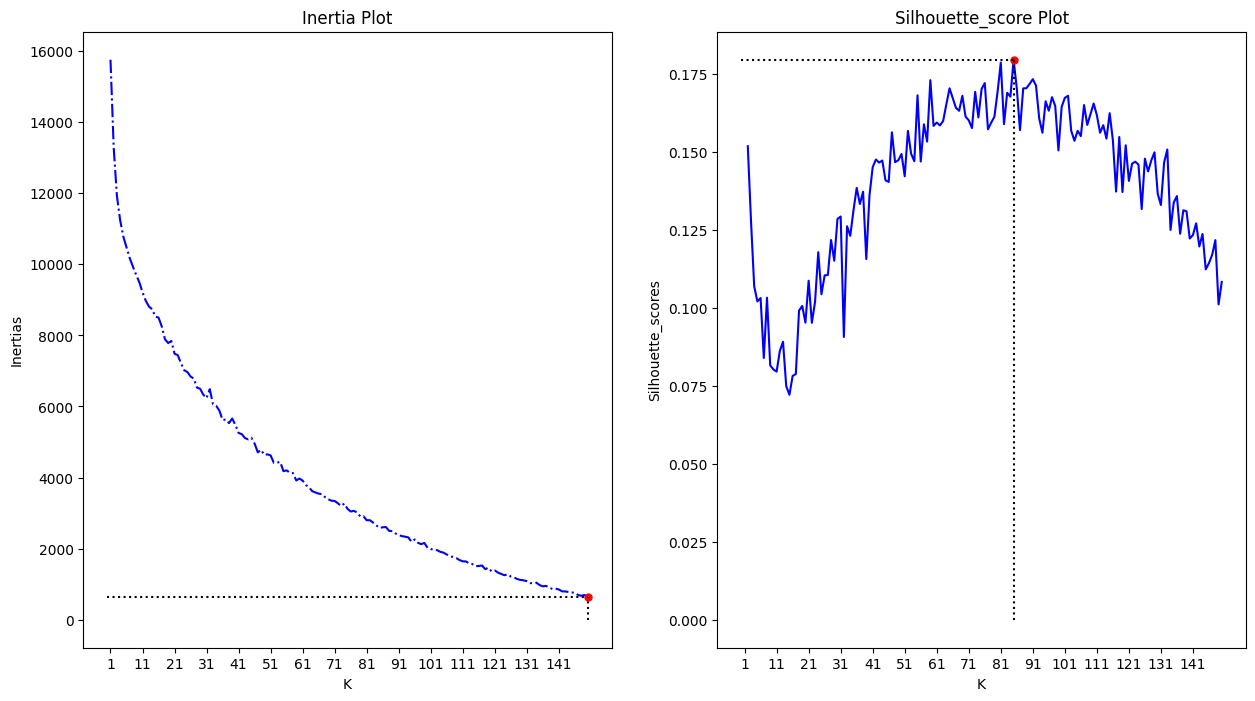

In [181]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xticks(range(1,k+1,10))
plt.plot(range(1,k+1),inertia_per_k,"-.",color="blue")
plt.plot(min_inertia_k+1,min_inertia,"ro",markersize=5)
plt.plot([0,min_inertia_k+1],[min_inertia,min_inertia],"k:")
plt.plot([min_inertia_k+1,min_inertia_k+1],[0,min_inertia],"k:")
plt.title("Inertia Plot")
plt.xlabel("K")
plt.ylabel("Inertias")


plt.subplot(1,2,2)
plt.xticks(range(1,k+1,10))
plt.plot(range(2,k+1),silhouette_scores,color="blue")
plt.plot(max_silhouette_score_k+2,max_silhouette_score,"ro",markersize=5)
plt.plot([0,max_silhouette_score_k+2],[max_silhouette_score,max_silhouette_score],"k:")
plt.plot([max_silhouette_score_k+2,max_silhouette_score_k+2],[0,max_silhouette_score],"k:")
plt.title("Silhouette_score Plot")
plt.xlabel("K")
plt.ylabel("Silhouette_scores")


According to silhouttee score the best number of clusters is 96. i.e 94+2, where as there is no elbow in terms of inertia

In [182]:
best_model = kmeans_per_k[max_silhouette_score_k+1]

Visualizing the clusters

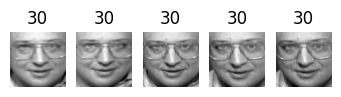

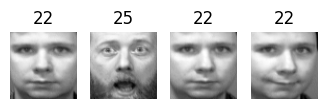

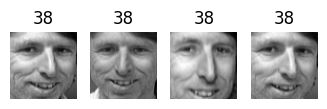

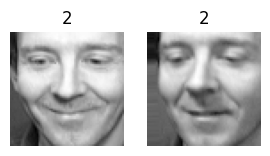

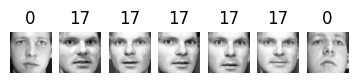

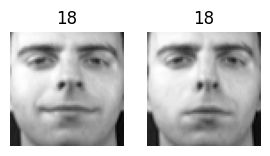

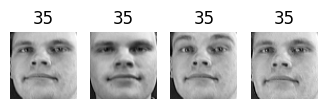

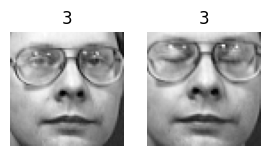

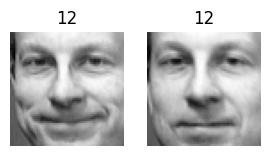

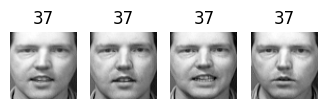

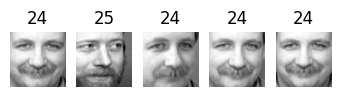

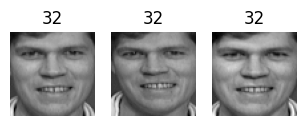

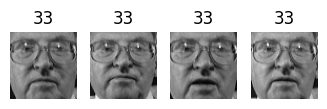

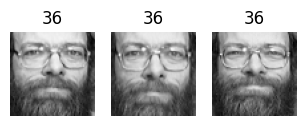

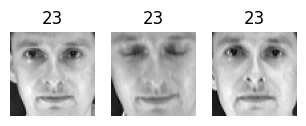

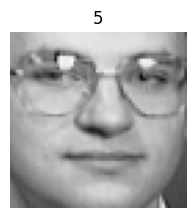

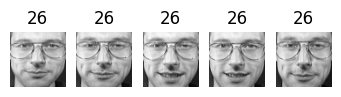

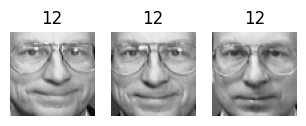

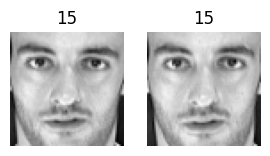

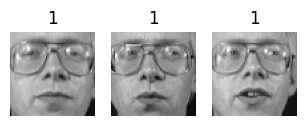

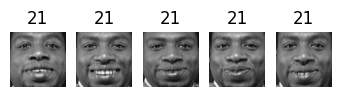

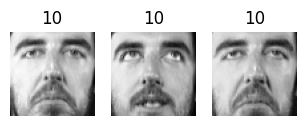

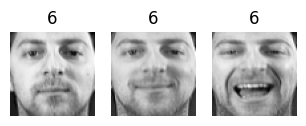

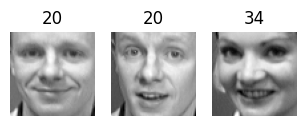

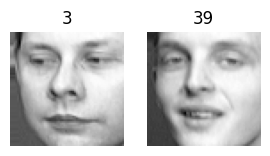

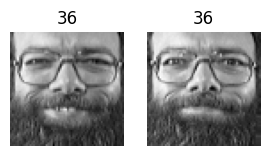

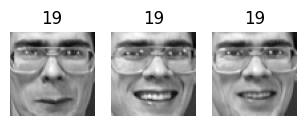

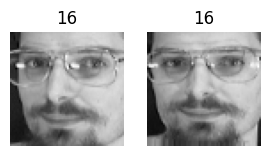

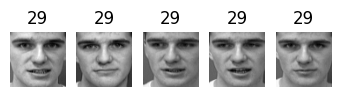

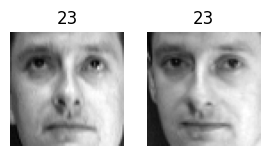

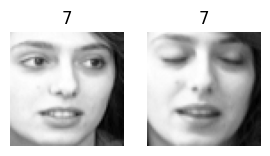

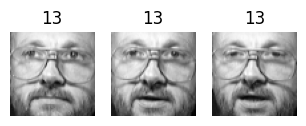

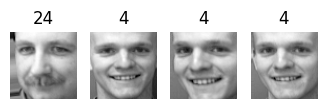

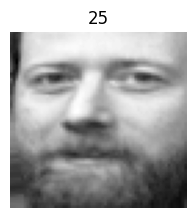

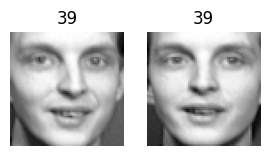

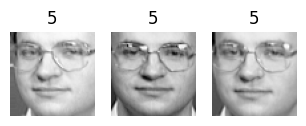

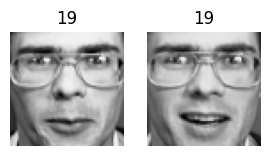

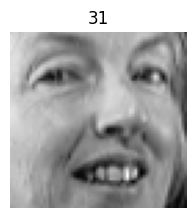

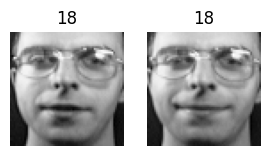

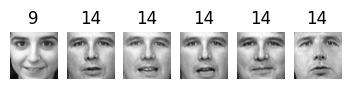

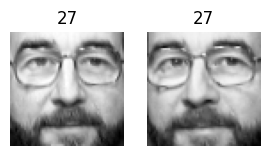

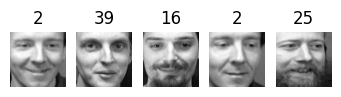

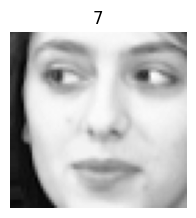

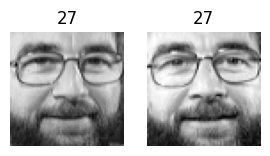

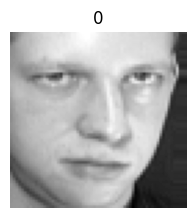

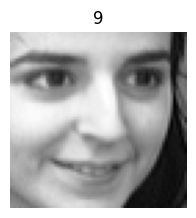

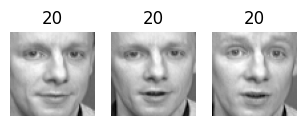

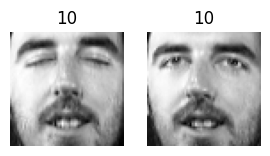

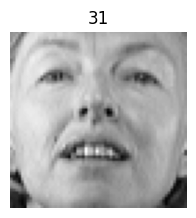

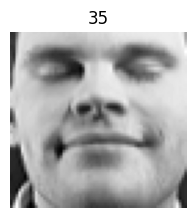

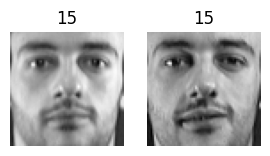

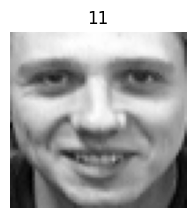

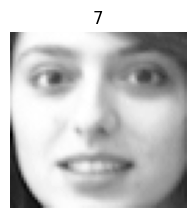

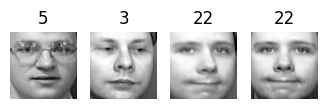

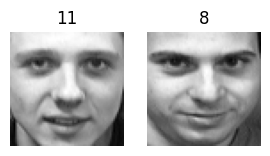

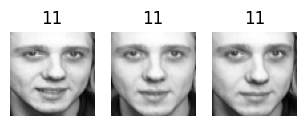

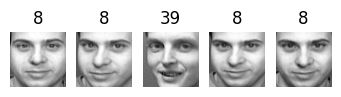

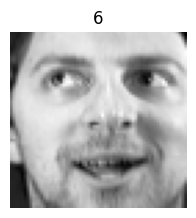

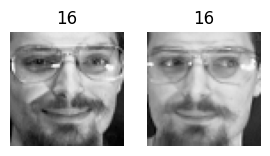

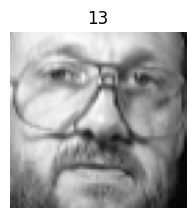

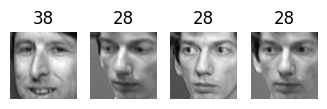

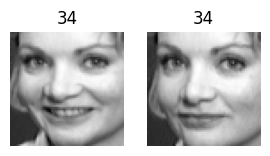

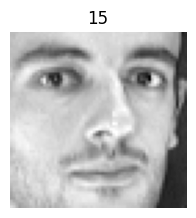

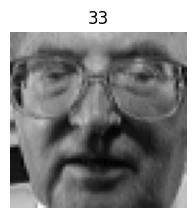

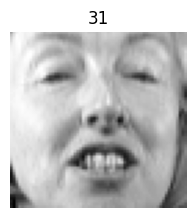

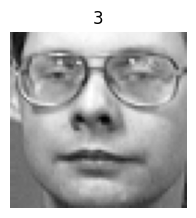

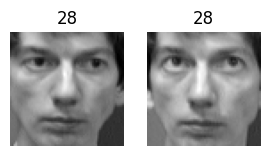

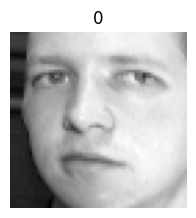

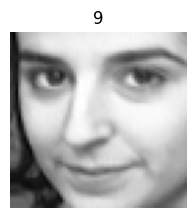

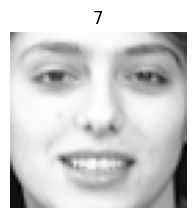

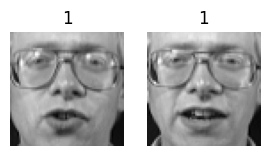

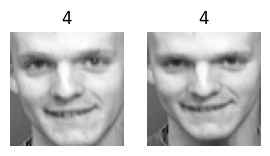

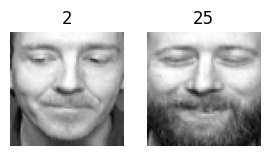

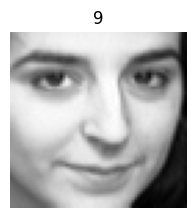

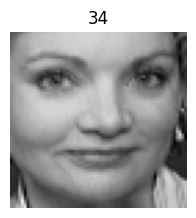

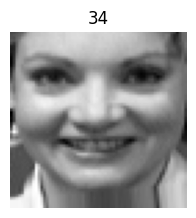

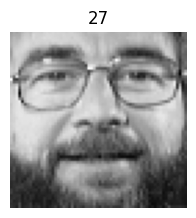

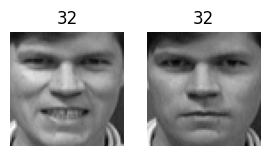

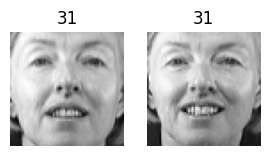

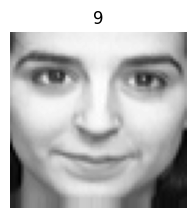

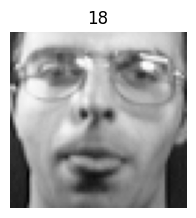

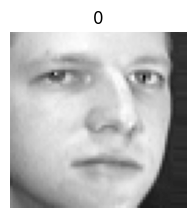

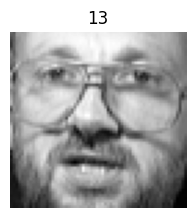

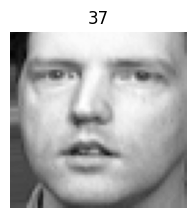

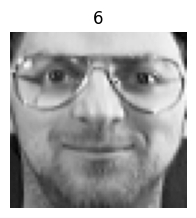

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [183]:
for i in range(96):
    inclusters = best_model.labels_==i
    faces=trainx[inclusters]
    targets=trainy[inclusters]
    plot_index=1
    plt.figure(figsize=(5,5))
    for i in range(len(faces)):
        plt.subplot(1,len(faces)+1,plot_index)
        plt.axis(False)
        plt.imshow(faces[i].reshape(64,64),cmap="gray")
        plt.title(targets[i])
        plot_index+=1
    plt.show()


<h1>Q 2)

In [237]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(trainx,trainy)
print("Score on regular dataset:",logreg.score(validx,validy))

Score on regular dataset: 0.9


In [194]:
from sklearn.model_selection import RandomizedSearchCV
param={
    "n_clusters": np.arange(1,133)
}
rscv= RandomizedSearchCV(KMeans(),param_distributions=param,cv=3,error_score='raise')
rscv.fit(trainx)

RandomizedSearchCV(cv=3, error_score='raise', estimator=KMeans(),
                   param_distributions={'n_clusters': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132])})

In [195]:
best_model = rscv.best_estimator_
best_model.fit(trainx)
trainx_reduced= best_model.transform(trainx)
validx_reduced= best_model.transform(validx)
testx_reduced= best_model.transform(testx)


In [238]:
logreg.fit(trainx_reduced,trainy)
print("Score on reduced dataset:",logreg.score(validx_reduced,validy))

Score on reduced dataset: 0.85


combining trainx and trainx reduced into a single trian set

In [247]:
trainx_plus=np.c_[trainx,trainx_reduced]
validx_plus=np.c_[validx,validx_reduced]
testx_plus=np.c_[testx,testx_reduced]

In [232]:
logreg.fit(trainx_plus,trainy)

/home/prashant/Study_material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [248]:
logreg.fit(trainx_plus,trainy)
print("Score on reduced dataset:",logreg.score(validx_plus,validy))

Score on reduced dataset: 0.88


<h1>Q 3) 

importing necesary libraries and olivetti faces datasets

In [32]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA
faces,targets = fetch_olivetti_faces(return_X_y=True)

In [33]:
trainx,testx,trainy,testy=train_test_split(faces,targets,stratify=targets,test_size=0.5)
testx,validx,testy,validy = train_test_split(testx,testy,stratify=testy,test_size=0.5)

Finding the number of clusters to transform to after reducing the dimensionality of the images

In [34]:
from sklearn.mixture import BayesianGaussianMixture
pca = PCA(n_components=0.99)
trainx_reduced = pca.fit_transform(trainx)
validx_reduced = pca.transform(validx)
testx_reduced = pca.transform(testx)
bgm= BayesianGaussianMixture(n_components=150,max_iter=20,n_init=10)
bgm.fit(trainx_reduced)

BayesianGaussianMixture(max_iter=20, n_components=150, n_init=10)

In [35]:
print("No of clusters=",len(bgm.weights_.round(2)[bgm.weights_.round(2)!=0.]))

No of clusters= 85


Generating reduced images using GaussianMixture

In [36]:
from sklearn.mixture import GaussianMixture
gm= GaussianMixture(n_components=91)
gm.fit(trainx_reduced)
generated_images= gm.sample(50)
generated_images = pca.inverse_transform(generated_images[0])

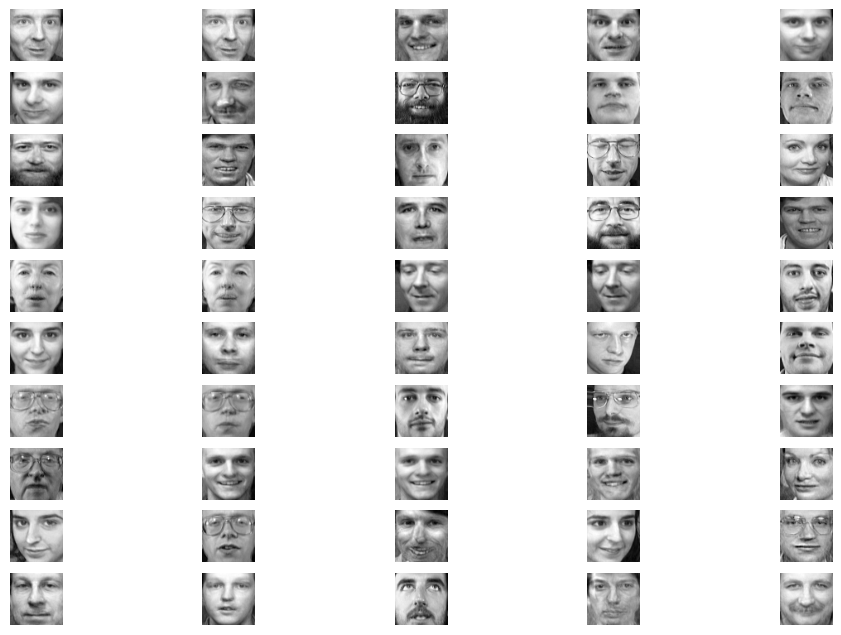

In [37]:
plt.figure(figsize=(12,8))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.axis(False)
    plt.imshow(generated_images[i].reshape(64,64),cmap="gray")

Creating anomalies by rotating, flipping and darkening the images

In [55]:
rotated= trainx.reshape(-1,64,64)
rotated= np.transpose(rotated,axes=[0,2,1])
rotated= rotated.reshape(-1,64*64)
print(rotated.shape)

flipped= trainx.reshape(-1,64,64)
flipped = flipped[:,::-1]
flipped= flipped.reshape(-1,64*64)
print(flipped.shape)

darker= trainx.copy()
darker[:,1:-1]*=0.3
print(darker.shape)

rotatedY= trainy
flippedY= trainy
darkerY= trainy

anomalies=np.r_[rotated,flipped,darker]

(200, 4096)
(200, 4096)
(200, 4096)


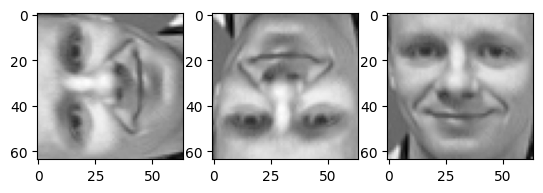

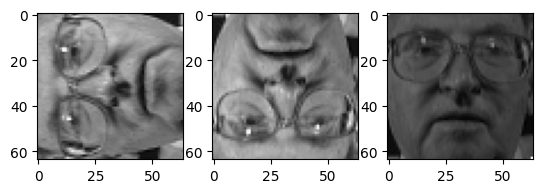

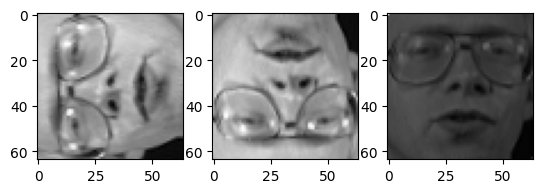

In [57]:
for i in range(3):
    plt.subplot(1,3,1)
    plt.imshow(rotated[i].reshape(64,64),cmap="gray")
    plt.subplot(1,3,2)
    plt.imshow(flipped[i].reshape(64,64),cmap="gray")
    plt.subplot(1,3,3)
    plt.imshow(darker[i].reshape(64,64),cmap="gray") 
    plt.show()         

Reducing and estimating the scores of the anomalies to see if they can be detected

In [59]:
anomaliesReduced =pca.transform(anomalies)
gm.score_samples(anomaliesReduced)

array([-3.33082041e+07, -2.25945494e+07, -3.69331516e+07, -3.08707131e+07,
       -4.05437888e+07, -3.70876146e+07, -5.96942311e+07, -2.59075106e+07,
       -3.45036675e+07, -2.20765549e+07, -3.63078577e+07, -2.51667456e+07,
       -3.34218896e+07, -2.73437795e+07, -4.29090554e+07, -3.62642280e+07,
       -5.18645437e+07, -3.86093912e+07, -5.54033551e+07, -3.63497260e+07,
       -2.52095966e+07, -4.00052828e+07, -3.56882623e+07, -3.34632474e+07,
       -2.88850245e+07, -4.67488208e+07, -5.54367801e+07, -4.55673812e+07,
       -3.01302170e+07, -3.80466155e+07, -4.51357032e+07, -3.97838737e+07,
       -4.05170019e+07, -5.06535600e+07, -3.37568294e+07, -2.93830060e+07,
       -5.15613870e+07, -2.58060070e+07, -6.78736054e+07, -4.67139504e+07,
       -3.75495803e+07, -3.62659040e+07, -3.31793747e+07, -3.58391551e+07,
       -2.83876562e+07, -4.00263019e+07, -4.96335716e+07, -2.70470948e+07,
       -4.57397291e+07, -3.91240971e+07, -3.18587045e+07, -3.36487044e+07,
       -3.42893491e+07, -

estimating the scores of the reduced data to compare with the anomalies

In [61]:
gm.score_samples(trainx_reduced[:9])

array([873.94675661, 890.10293733, 889.19012686, 890.37911466,
       882.43008724, 874.92446797, 896.99883432, 889.35395565,
       897.62368657])

As we can see that that the densities of the original images are much higher than that of the anomalies. Hence, with an appropriate threshold, they can easily be detected.

<h1>Q4

Fetching the previously computed normal images along with its reduced, and reconstructed form and also  anomalies along with its reduced, and reconstructed form  

In [62]:
normal_images=trainx
reduced_normal_image= trainx_reduced
reconstructed_normal_image = pca.inverse_transform(reduced_normal_image)
anomaly_images= anomalies
reduced_anomaly_image = anomaliesReduced
reconstructed_anomaly_image = pca.inverse_transform(reduced_anomaly_image)


creating a function to compute the mean squared error 

In [63]:
def reconstruction_error( original,reconstructed ):
    mse= np.square(original-reconstructed)
    return mse.mean()

Computing the mean squared error of the reconstruction of original images and anomalies.

In [65]:
print("Reconstructed error of normal images,",reconstruction_error(normal_images,reconstructed_normal_image))
print("Reconstructed error of anomales,",reconstruction_error(anomaly_images,reconstructed_anomaly_image))

Reconstructed error of normal images, 0.00018936914
Reconstructed error of anomales, 0.0061440114


It can be seen that the anomalies has slightly higher reconstruction error than the original images. lets plot and see the reconstructed anomalies

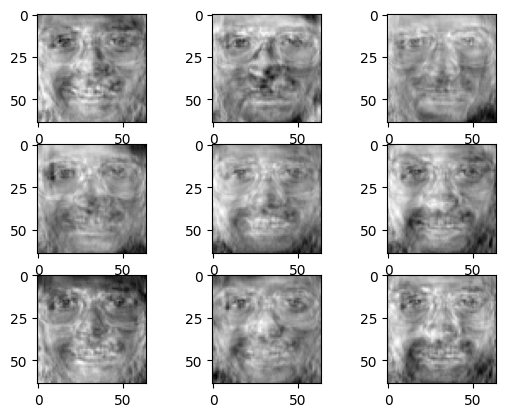

In [68]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reconstructed_anomaly_image[i].reshape(64,64),cmap="gray")

They don't look good